In [4]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import silhouette_samples, silhouette_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

df_train = pd.read_csv('data_wnv/train.csv')
df_spray = pd.read_csv('data_wnv/spray.csv')
df_weather = pd.read_csv('data_wnv/weather.csv')
df_test = pd.read_csv('data_wnv/test.csv')

/Users/matthewterribile/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
df_train_test = pd.concat([df_train.set_index('Trap'),df_train.set_index('Trap')], axis=1, join='inner')

In [6]:
df_train_weather = pd.merge(df_train,df_weather,on='Date',how='inner')

In [7]:
df_train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [8]:
# features[features.construction_year==0].construction_year=2010

df_train.head(100)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [9]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(df_train)

missing values 
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=10506, step=1)
dataframe types 
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object
dataframe shape 
(10506, 12)
dataframe describe 
              Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  1

In [10]:
df_spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [11]:
df_weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [12]:
list(df_weather)

['Station',
 'Date',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'CodeSum',
 'Depth',
 'Water1',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed']

In [13]:
df_weather.PrecipTotal.head(10)

0    0.00
1    0.00
2    0.00
3    0.00
4    0.00
5    0.00
6       T
7    0.00
8       T
9       T
Name: PrecipTotal, dtype: object

In [14]:
df_weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [15]:
df_train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [16]:
pd.concat([df_train.set_index('Trap'),df_train.set_index('Trap')], axis=1, join='inner')

,Date,Address,Species,Block,Street,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Address,Species,Block,Street,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Trap,,,,,,,,,,,,,,,,,,,,,
T002,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
T002,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
T007,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
T015,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
T015,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
T045,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,...,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
T046,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,...,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
T048,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,...,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
T048,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,...,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0


In [17]:
list(df_train_test)

['Date',
 'Address',
 'Species',
 'Block',
 'Street',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'NumMosquitos',
 'WnvPresent',
 'Date',
 'Address',
 'Species',
 'Block',
 'Street',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'NumMosquitos',
 'WnvPresent']

In [18]:
df_train_test.columns = ['Date_1', 'Address_1', 'Species_1', 'Block_1', 'Street_1', 'AddressNumberAndStreet_1', 'Latitude_1', 'Longitude_1', 'AddressAccuracy_1', 'NumMosquitos_1', 'WnvPresent_1', 'Date_2', 'Address_2', 'Species_2', 'Block_2', 'Street_2', 'AddressNumberAndStreet_2', 'Latitude_2', 'Longitude_2', 'AddressAccuracy_2', 'NumMosquitos_2', 'WnvPresent_2']

In [19]:
df_train_test.head(100)

,Date_1,Address_1,Species_1,Block_1,Street_1,AddressNumberAndStreet_1,Latitude_1,Longitude_1,AddressAccuracy_1,NumMosquitos_1,...,Address_2,Species_2,Block_2,Street_2,AddressNumberAndStreet_2,Latitude_2,Longitude_2,AddressAccuracy_2,NumMosquitos_2,WnvPresent_2
Trap,,,,,,,,,,,,,,,,,,,,,
T002,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
T002,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
T007,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
T015,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
T015,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
T045,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,...,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
T046,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,...,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
T048,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,...,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
T048,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,...,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0


In [20]:
df_train_weather.head(100)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [21]:
## CORRELATION BETWEEN WNV PRESENCE IN TRAIN DATA SET AND WNV PRESENCE IN TEST DATA SET

X1 = pd.DataFrame(df_train_test['WnvPresent_1'])
y = pd.DataFrame(df_train_test['WnvPresent_2'])

## FIND BETA
lm = linear_model.LinearRegression()
model = lm.fit(X1,y)

## RETURN BETA
model.coef_

array([[ 1.]])

In [22]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

predictions = lm.predict(X1)
print(predictions)[0:5]

[[ -1.54043445e-15]
 [ -1.54043445e-15]
 [ -1.54043445e-15]
 [ -1.54043445e-15]
 [ -1.54043445e-15]]


/Users/matthewterribile/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
scores = cross_val_score(model, X1, y, cv=6)
print 'Cross-validated scores:', scores

Cross-validated scores: [ 1.  1.  1.  1.  1.  1.]


In [24]:
## CORRELATION BETWEEN WNV PRESENCE IN TRAIN DATA SET AND WNV PRESENCE IN TEST DATA SET

X1 = pd.DataFrame(df_train_test['NumMosquitos_1'])
y = pd.DataFrame(df_train_test['NumMosquitos_2'])

## FIND BETA
lm = linear_model.LinearRegression()
model = lm.fit(X1,y)

## RETURN BETA
model.coef_

array([[ 1.]])

In [25]:
scores = cross_val_score(model, X1, y, cv=6)
print 'Cross-validated scores:', scores

Cross-validated scores: [ 1.  1.  1.  1.  1.  1.]


In [26]:
# ‘bar’ or ‘barh’ for bar plots
# ‘hist’ for histogram
# ‘box’ for boxplot
# ‘kde’ or 'density' for density plots
# ‘area’ for area plots
# ‘scatter’ for scatter plots
# ‘hexbin’ for hexagonal bin plots
# ‘pie’ for pie plots

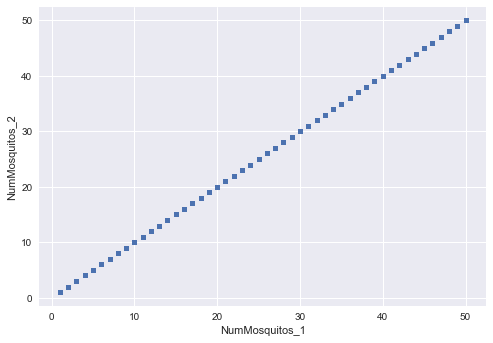

In [27]:
df_train_test.plot(kind = 'scatter', x ='NumMosquitos_1',y ='NumMosquitos_2')

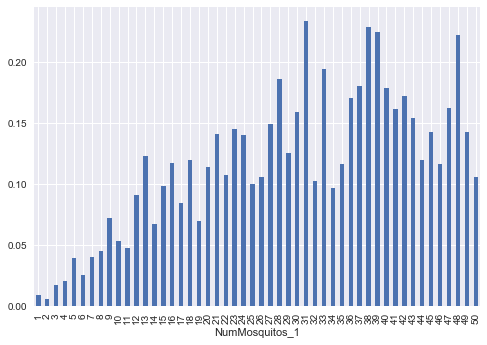

In [28]:
df_train_test.groupby(['NumMosquitos_1'])['WnvPresent_1'].mean().plot.bar()

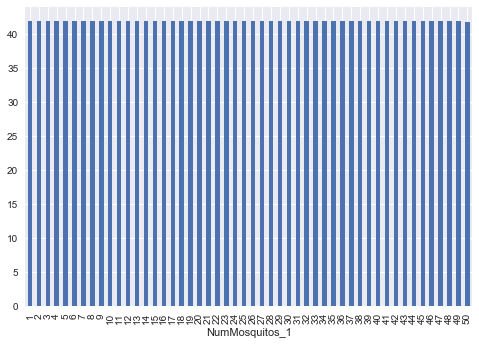

In [29]:
df_train_test.groupby(['NumMosquitos_1'])['Latitude_1'].mean().plot.bar()

In [30]:
list(df_train_test)

['Date_1',
 'Address_1',
 'Species_1',
 'Block_1',
 'Street_1',
 'AddressNumberAndStreet_1',
 'Latitude_1',
 'Longitude_1',
 'AddressAccuracy_1',
 'NumMosquitos_1',
 'WnvPresent_1',
 'Date_2',
 'Address_2',
 'Species_2',
 'Block_2',
 'Street_2',
 'AddressNumberAndStreet_2',
 'Latitude_2',
 'Longitude_2',
 'AddressAccuracy_2',
 'NumMosquitos_2',
 'WnvPresent_2']

In [31]:
### Matt started here
# change type of date
# Not sure what address accuracy is - values 8,9,5,3
# No null values
# Difference between mosquito types? - make dummy variables for mosquito species
# Traps all have at least one mosquito
# 10506 rows, 12 columns
# Address number and street are redundant of address, perhaps of latitude / longitude?
# 136 traps.   Do they stay at the same place?

In [32]:
df_train.head(3)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [33]:
df_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [34]:
df_train.Trap.value_counts()
# 136 traps

T900     750
T115     542
T138     314
T002     185
T135     183
T054     163
T128     160
T151     156
T212     152
T090     151
T114     148
T158     147
T048     146
T031     146
T903     140
T008     139
T011     133
T209     130
T200     129
T073     128
T030     126
T003     122
T094     121
T028     117
T066     116
T074     115
T047     114
T221     112
T102     112
T159     111
        ... 
T141      22
T162      21
T219      21
T156      21
T154      21
T206      21
T075      20
T070      20
T071      19
T142      18
T034      17
T097      17
T050      17
T044      15
T051      15
T060      15
T001      15
T149      14
T005      14
T157      14
T072      13
T004      12
T054C      9
T078       8
T229       8
T238       7
T076       5
T094B      5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

In [35]:
df_train[df_train.Trap=='T900'].Address.value_counts()

ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA    750
Name: Address, dtype: int64

In [36]:
print df_train[df_train.Trap=='T115'].Address.value_counts()
print df_train[df_train.Trap=='T115'].Block.value_counts()


South Doty Avenue, Chicago, IL, USA    542
Name: Address, dtype: int64
12    542
Name: Block, dtype: int64


In [37]:
print df_train[df_train.Trap=='T138'].Address.value_counts()
print df_train[df_train.Trap=='T138'].Block.value_counts()

South Stony Island Avenue, Chicago, IL, USA    314
Name: Address, dtype: int64
10    314
Name: Block, dtype: int64


In [38]:
print df_train[df_train.Trap=='T002'].Address.value_counts()
print df_train[df_train.Trap=='T002'].Block.value_counts()

4100 North Oak Park Avenue, Chicago, IL 60634, USA    185
Name: Address, dtype: int64
41    185
Name: Block, dtype: int64


In [39]:
# investigate statement: Some traps are "satellite traps". These are traps that are set up near 
# (usually within 6 blocks) an established trap to enhance surveillance efforts. 
# Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220. 
print 'Primary trap'
print df_train[df_train.Trap=='T094'].Address.value_counts()
print df_train[df_train.Trap=='T094'].Block.value_counts()
print df_train[df_train.Trap=='T094'].Latitude.value_counts()
print df_train[df_train.Trap=='T094'].Longitude.value_counts()
print 'Sattelite trap'
print df_train[df_train.Trap=='T094B'].Address.value_counts()
print df_train[df_train.Trap=='T094B'].Block.value_counts()
print df_train[df_train.Trap=='T094B'].Latitude.value_counts()
print df_train[df_train.Trap=='T094B'].Longitude.value_counts()


Primary trap
1700 West 95th Street, Chicago, IL 60643, USA    121
Name: Address, dtype: int64
17    121
Name: Block, dtype: int64
41.720848    121
Name: Latitude, dtype: int64
-87.666014    121
Name: Longitude, dtype: int64
Sattelite trap
9600 South Longwood Drive, Chicago, IL 60643, USA    5
Name: Address, dtype: int64
96    5
Name: Block, dtype: int64
41.71914    5
Name: Latitude, dtype: int64
-87.669539    5
Name: Longitude, dtype: int64


In [40]:
# Sattelite traps have different block, latitude, and longitude data than primary traps

In [41]:
# There is a 1:1:1:1 mapping between Trap, Block,Address, and AddressNumberandStreet
# For purposes of regression we only need one of them in the input data set

In [42]:
#Date                       object  - convert to date format
#Address                    object  - redundant to Trap, remove for regression, may want zip code from
#Species                    object  - 7 types, convert to dummy variable?  Or is it useful in regression?
#                                          - some more likely to carry virus?
#Block                       int64  - redundant to Trap, remove for regression
#Street                     object  - redundant to Trap, remove for regression
#Trap                       object  - do we want to regress on this as categorical or  Lat&Long? 
#AddressNumberAndStreet     object  - redundant to Trap, remove for regression
#Latitude                  float64  - do we want to regress on this?   Don't think we want to treat as continuous variable
#Longitude                 float64  - do we want to regress on this?   Don't think we want to treat as continuous variable
#AddressAccuracy             int64  - 3,5,9,8 from GeoCoder.   See defn below - This probably doesn't belong in the regression
#                                    - When a 3 or 5 has the virus, may want to spray wider area
#NumMosquitos                int64  - 1 to 50 - when above 50, another record is created
#                                    - Not sure how to treat multiple rows for same trap and same day
#                                    - Some multiples are different mosquito, some are the same, but may be Y/N on WNV
#WnvPresent                  int64  - 0 (WNV not present, about 95%) or 1 (WNV present, about 5%)

# Address Accuracy - When the geocoder receives a query it attempts to find the best matched feature for the address 
# given. Depending on the amount of data we have for the area concerned, it may be able to identify a 
# specific building that matches, or it may only be able to match the street or district.  
# If it can only match a higher level feature such as the district it will still return a lat/long,
# but it will be for the centroid of that feature, which is likely to be offset from the location 
# of the specific address requested. The Accuracy tells you the scale of the object that matched, 
# so you know how precise the geocode is likely to be.
# https://www.experts-exchange.com/questions/27986524/How-do-I-translate-the-Google-maps-v3-Geocode-location-type-to-a-Geocode-score-0-9.html
# 3 = Sub-region (county, municipality, etc.) level accuracy  - 91 of these
# 5 = Post code (zip code) level accuracy  - 1807 of these
# 8 = Address level accuracy  -  4628 of these - this is very accurate
# 9 = Premise (building name, property name, shopping center, etc.) level accuracy - 3980 of these - this is very accurate

In [43]:
# address accuracy counts
df_train.AddressAccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64

In [44]:
# Need to understand how many records are from the same date with the same trap.   Should we combine them?
# Assume not split between Test and Train?

# Create a dataframe with just date, trap number, and species.   Check for how many duplicates
df_temp = df_train[['Date','Trap','Species']]
df_temp.duplicated().sum()

2031

In [45]:
# look at some duplicates

In [46]:
#df_temp.duplicated()

In [47]:
#### look at rows 10484 - 10490
df_train[10484:10490]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
10484,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,39,1
10485,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,4,0
10486,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,16,0
10487,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,9,0
10488,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,11,0
10489,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,1,0


In [48]:
# 10484 similar to 10485 except 10484 has WNV present
# 10486 - 10489 all look similar except a different number of mosquitos in the traps (and all less than 50)

In [49]:
# do all mosquito types have WNV?

In [50]:
df_train[df_train.WnvPresent==1].Species.value_counts()


CULEX PIPIENS/RESTUANS    262
CULEX PIPIENS             240
CULEX RESTUANS             49
Name: Species, dtype: int64

In [51]:
# compare to those without Wnv
df_train[df_train.WnvPresent==0].Species.value_counts()

CULEX PIPIENS/RESTUANS    4490
CULEX RESTUANS            2691
CULEX PIPIENS             2459
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [52]:
'''  Quick calculation in xls.   Some type of mosquitos more likely to have WNV.
Rows			                     No WNV	WNV	Total	% with
CULEX PIPIENS/RESTUANS    			4490	262	4752	5.5%
CULEX RESTUANS           			2691	49	2740	1.8%
CULEX PIPIENS             			2459	240	2699	8.9%
CULEX TERRITANS            			222	    0	222	    0.0%
CULEX SALINARIUS        			86	    0	86	    0.0%
CULEX TARSALIS          			6	    0	6	    0.0%
CULEX ERRATICUS            			1	    0	1	    0.0%
			                        9955	551	10506	5.2%'''

'  Quick calculation in xls.   Some type of mosquitos more likely to have WNV.\nRows\t\t\t                     No WNV\tWNV\tTotal\t% with\nCULEX PIPIENS/RESTUANS    \t\t\t4490\t262\t4752\t5.5%\nCULEX RESTUANS           \t\t\t2691\t49\t2740\t1.8%\nCULEX PIPIENS             \t\t\t2459\t240\t2699\t8.9%\nCULEX TERRITANS            \t\t\t222\t    0\t222\t    0.0%\nCULEX SALINARIUS        \t\t\t86\t    0\t86\t    0.0%\nCULEX TARSALIS          \t\t\t6\t    0\t6\t    0.0%\nCULEX ERRATICUS            \t\t\t1\t    0\t1\t    0.0%\n\t\t\t                        9955\t551\t10506\t5.2%'

In [53]:
# Would also be interesting to see # mosquitos per trap by type

In [54]:

from scipy.stats import t
## t test using scipy.stats won't work. Requires two samples to be of same size.   Also not sure it works for proportions
## scipy.stats.ttest_rel(a, b, axis=0, nan_policy='propagate')

## found this https://stackoverflow.com/questions/26615019/python-proportion-test-similar-to-prop-test-in-r
# Do chi squared test
from scipy import stats
import numpy as np
# do test for  Restuans vs. Pipiens / Restuans
disease = np.array([[4752,262], [2740,49]])
stats.chi2_contingency(disease)

(55.436573984211044,
 9.652371892086369e-14,
 1,
 array([[ 4814.15968217,   199.84031783],
        [ 2677.84031783,   111.15968217]]))

In [55]:
#  output is x-squared and p value
# p-value is small so unlikely from same sample
# try again with 
# do test for  Pipiens vs. Pipiens / Restuans
disease = np.array([[4752,262], [2699,240]])
stats.chi2_contingency(disease)

(26.600088228381278,
 2.5023232591543785e-07,
 1,
 array([[ 4697.51213379,   316.48786621],
        [ 2753.48786621,   185.51213379]]))

In [56]:
# p-value is small so unlikely from same sample

In [ ]:
# Take another look at rows with 50 per trap

In [57]:
df_train[df_train.NumMosquitos==50]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
529,2007-07-18,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,0
530,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0
531,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0
533,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",CULEX RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0
547,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0


In [60]:
# Take a closer look at rows 349 to 354
df_train[350:356]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
352,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,39,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
354,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,27,0
355,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,29,0
